In [17]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [18]:
target = pd.read_csv("files_for_lab/target.csv")
numerical = pd.read_csv("files_for_lab/numerical.csv")
categorical = pd.read_csv("files_for_lab/categorical.csv")

In [19]:
data = pd.concat([target, numerical, categorical], axis = 1)
data.head()

,TARGET_B,TARGET_D,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,0.0,0,60.000000,5,9,0,0,39,34,...,37,12,92,8,94,2,95,12,89,11
1,0,0.0,1,46.000000,6,9,16,0,15,55,...,52,2,93,10,95,12,95,12,93,10
2,0,0.0,1,61.611649,3,1,2,0,20,29,...,0,2,91,11,92,7,95,12,90,1
3,0,0.0,0,70.000000,1,4,2,0,23,14,...,28,1,87,11,94,11,95,12,87,2
4,0,0.0,0,78.000000,3,2,60,1,28,9,...,20,1,93,10,96,1,96,1,79,3


In [20]:
data.shape

(95412, 339)

In [21]:
data["TARGET_B"].value_counts(dropna = False)

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [22]:
data["TARGET_D"].value_counts(dropna = False)

0.00     90569
10.00      941
15.00      591
20.00      577
5.00       503
         ...  
18.25        1
10.70        1
2.50         1
16.87        1
44.21        1
Name: TARGET_D, Length: 71, dtype: int64

In [23]:
def is_any_na(df):
    for i in df:
        if df[i].isna().sum() > 0:
            print("NaN values in ", i)
        else:
            pass
    return "done"

In [24]:
is_any_na(data)

'done'

In [25]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes("object")

In [26]:
for col in categoricalX.columns:
    print(col, categoricalX[col].nunique())

STATE 12
HOMEOWNR 2
GENDER 3
RFA_2R 1
RFA_2A 4
GEOCODE2 4
DOMAIN_A 5


In [27]:
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
trainset = pd.concat([X_train, y_train], axis=1)

In [29]:
cat_1 = resample(trainset[trainset["TARGET_B"] == 1], replace=True, n_samples = len(trainset[trainset["TARGET_B"] == 0]),random_state=42)

In [30]:
cat_0 = trainset[trainset["TARGET_B"] == 0]

In [31]:
trainset_new = pd.concat([cat_0, cat_1], axis = 0)
trainset_new = trainset_new.sample(frac =1)
X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']

print(X_train.shape, y_train.shape)

(144972, 355) (144972,)


In [32]:
X_train

,TARGET_D,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,...,14,15,16,17,18,19,20,21,22,23
46152,10.0,1,82.000000,1,2,0,0,13,19,21,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4524,10.0,2,74.000000,2,9,0,0,28,14,38,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44020,20.0,1,84.000000,5,9,0,0,27,19,66,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34690,15.0,0,63.000000,4,7,15,0,36,23,47,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
56757,0.0,1,57.000000,4,4,1,1,34,54,17,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34429,0.0,0,86.000000,5,9,0,0,39,13,42,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
616,15.0,0,75.000000,3,7,5,0,18,51,13,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
946,17.0,0,61.611649,5,9,0,0,21,28,28,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
39629,10.0,1,43.000000,3,1,0,0,23,34,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [33]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

The R2 for the Random Forest in the TRAIN set is 0.84
The R2 for the Random Forest in the TEST  set is 0.77
y_test value_counts 0    18083
1     1000
Name: TARGET_B, dtype: int64
The accuracy for the Y_pred is 0.77


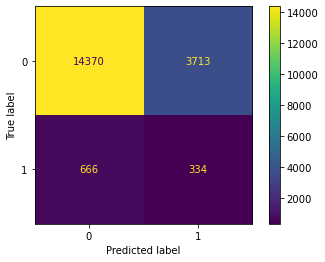

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(max_depth=10,
                             min_samples_split=20,
                             min_samples_leaf =30,
                             max_samples=0.8,
                             random_state = 42)
rfc.fit(X_train, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(rfc.score(X_train, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(rfc.score(X_test, y_test)))
y_pred = rfc.predict(X_test)
print("y_test value_counts", y_test.value_counts())
print("The accuracy for the Y_pred is {:.2f}".format(accuracy_score(y_test, y_pred)))
cm_pred = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_pred)
disp.plot()
plt.show()

In [35]:
cross_val_scores = cross_val_score(rfc, X_train, y_train, cv=5)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean R2 of the folds was 0.81


In [ ]:
rfc_2 = RandomForestClassifier(max_depth=5,
                             min_samples_split=10,
                             min_samples_leaf =20,
                             max_samples=0.85,
                             random_state = 42)
rfc_2.fit(X_train, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(rfc_2.score(X_train, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(rfc_2.score(X_test, y_test)))
y_pred_2 = rfc_2.predict(X_test)
print("y_test value_counts", y_test.value_counts())
print("The accuracy for the Y_pred is {:.2f}".format(accuracy_score(y_test, y_pred_2)))
cm_pred_2 = confusion_matrix(y_test,y_pred_2)
disp_2 = ConfusionMatrixDisplay(confusion_matrix = cm_pred_2)
disp_2.plot()
plt.show()

In [ ]:
cross_val_scores = cross_val_score(rfc, X_train, y_train, cv=5)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

In [ ]:
score = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           'log_loss': 'neg_log_loss'}

In [ ]:
cross_scores = cross_validate(rfc, X_train, y_train, scoring=score, cv=5)

In [ ]:
max(cross_scores.get("test_accuracy"))

The false positive it could be understood as something that the company expect to get but don't, on the opposite, a false negative it would be something not expected that they get. That situation puts the false positives as potencially more harmful to the company that the false negatives. Relying on something that won't happen could have a negative impact.

The algorithim should have the best possible accuracy focused on the positive results, that way it would minimize the setbacks. 